### Multiple Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [2]:
import pandas as pd

# Read the data
ocean = pd.read_csv('ocean1.csv', index_col=0)

# Drop specified columns
columns_to_drop = ['Depthm', 'STheta', 'O2Sat', 'Oxy_µmol/Kg']
ocean = ocean.drop(columns=columns_to_drop)

# Convert selected columns to object type
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')

# Check the updated DataFrame
ocean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salnty    2000 non-null   float64
 1   T_degC    2000 non-null   float64
 2   O2ml_L    2000 non-null   float64
 3   Year      2000 non-null   object 
 4   Month     2000 non-null   object 
 5   Bottom_D  2000 non-null   float64
 6   Wea       2000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 125.0+ KB


In [3]:
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')

In [4]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_74955/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_74955/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_74955/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,T_degC,O2ml_L,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,5.63,0.70,3935.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,9.25,2.08,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,8.72,1.75,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,8.50,1.20,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,7.81,0.70,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,8.03,1.45,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,7.58,1.12,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,6.95,0.72,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,6.03,0.40,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [34.24823981]
Coefficients: 
 [[ 1.82797038e-02 -1.42723925e-01 -8.60406002e-06 -9.79353414e-03
  -5.60885758e-03 -2.03466130e-03  1.41838094e-02  1.49155510e-03
  -2.62812575e-02  5.05173569e-03 -6.87058102e-02  3.31005290e-03
   1.59333642e-02 -5.63294651e-03  1.61880702e-02  7.28297172e-06
  -5.35626347e-01  6.64753853e-03  2.45325007e-03 -4.76641344e-03
  -9.71380353e-03 -4.80833770e-03  9.21174683e-03  5.39771797e-03
   6.09818585e-03]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     550.1
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:13:23   Log-Likelihood:                 3259.0
No. Observations:                2000   AIC:                       

In [7]:
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 87.38
Mean Absolute Error: 0.03011960996119626
Mean Square Error: 0.002094097125745433
Root Mean Square Error: 0.045761305988197415


In [8]:
# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Model performance on training set
y_train_pred = mlr.predict(x_train)
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, y_train_pred)
train_meanSqErr = metrics.mean_squared_error(y_train, y_train_pred)
train_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Square Error:', train_meanSqErr)
print('Root Mean Square Error:', train_rootMeanSqErr)

# Model performance on testing set
y_test_pred = mlr.predict(x_test)
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
test_meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
test_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Square Error:', test_meanSqErr)
print('Root Mean Square Error:', test_rootMeanSqErr)


Training Set Performance:
R squared: 87.44
Mean Absolute Error: 0.02970020167609966
Mean Square Error: 0.002305433697948931
Root Mean Square Error: 0.04801493203107686

Testing Set Performance:
R squared: 87.07
Mean Absolute Error: 0.03011960996119626
Mean Square Error: 0.002094097125745433
Root Mean Square Error: 0.045761305988197415


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features (x) and target variable (y)
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 88.11
Mean Absolute Error: 0.029552363772324824
Mean Squared Error: 0.002143966044810125
Root Mean Squared Error: 0.04630298094950394

Testing Set Performance:
R squared: 87.01
Mean Absolute Error: 0.02968123156853629
Mean Squared Error: 0.0021853316348680774
Root Mean Squared Error: 0.04674753078899545

Cross-Validation Scores:
R squared scores: [0.86340078 0.87388664 0.89432259 0.84440589 0.83666999]
Average R squared: 86.25
Mean Squared Error scores: [0.00317422 0.00185898 0.00151299 0.0030876  0.00300937]
Average Mean Squared Error: 0.0025


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


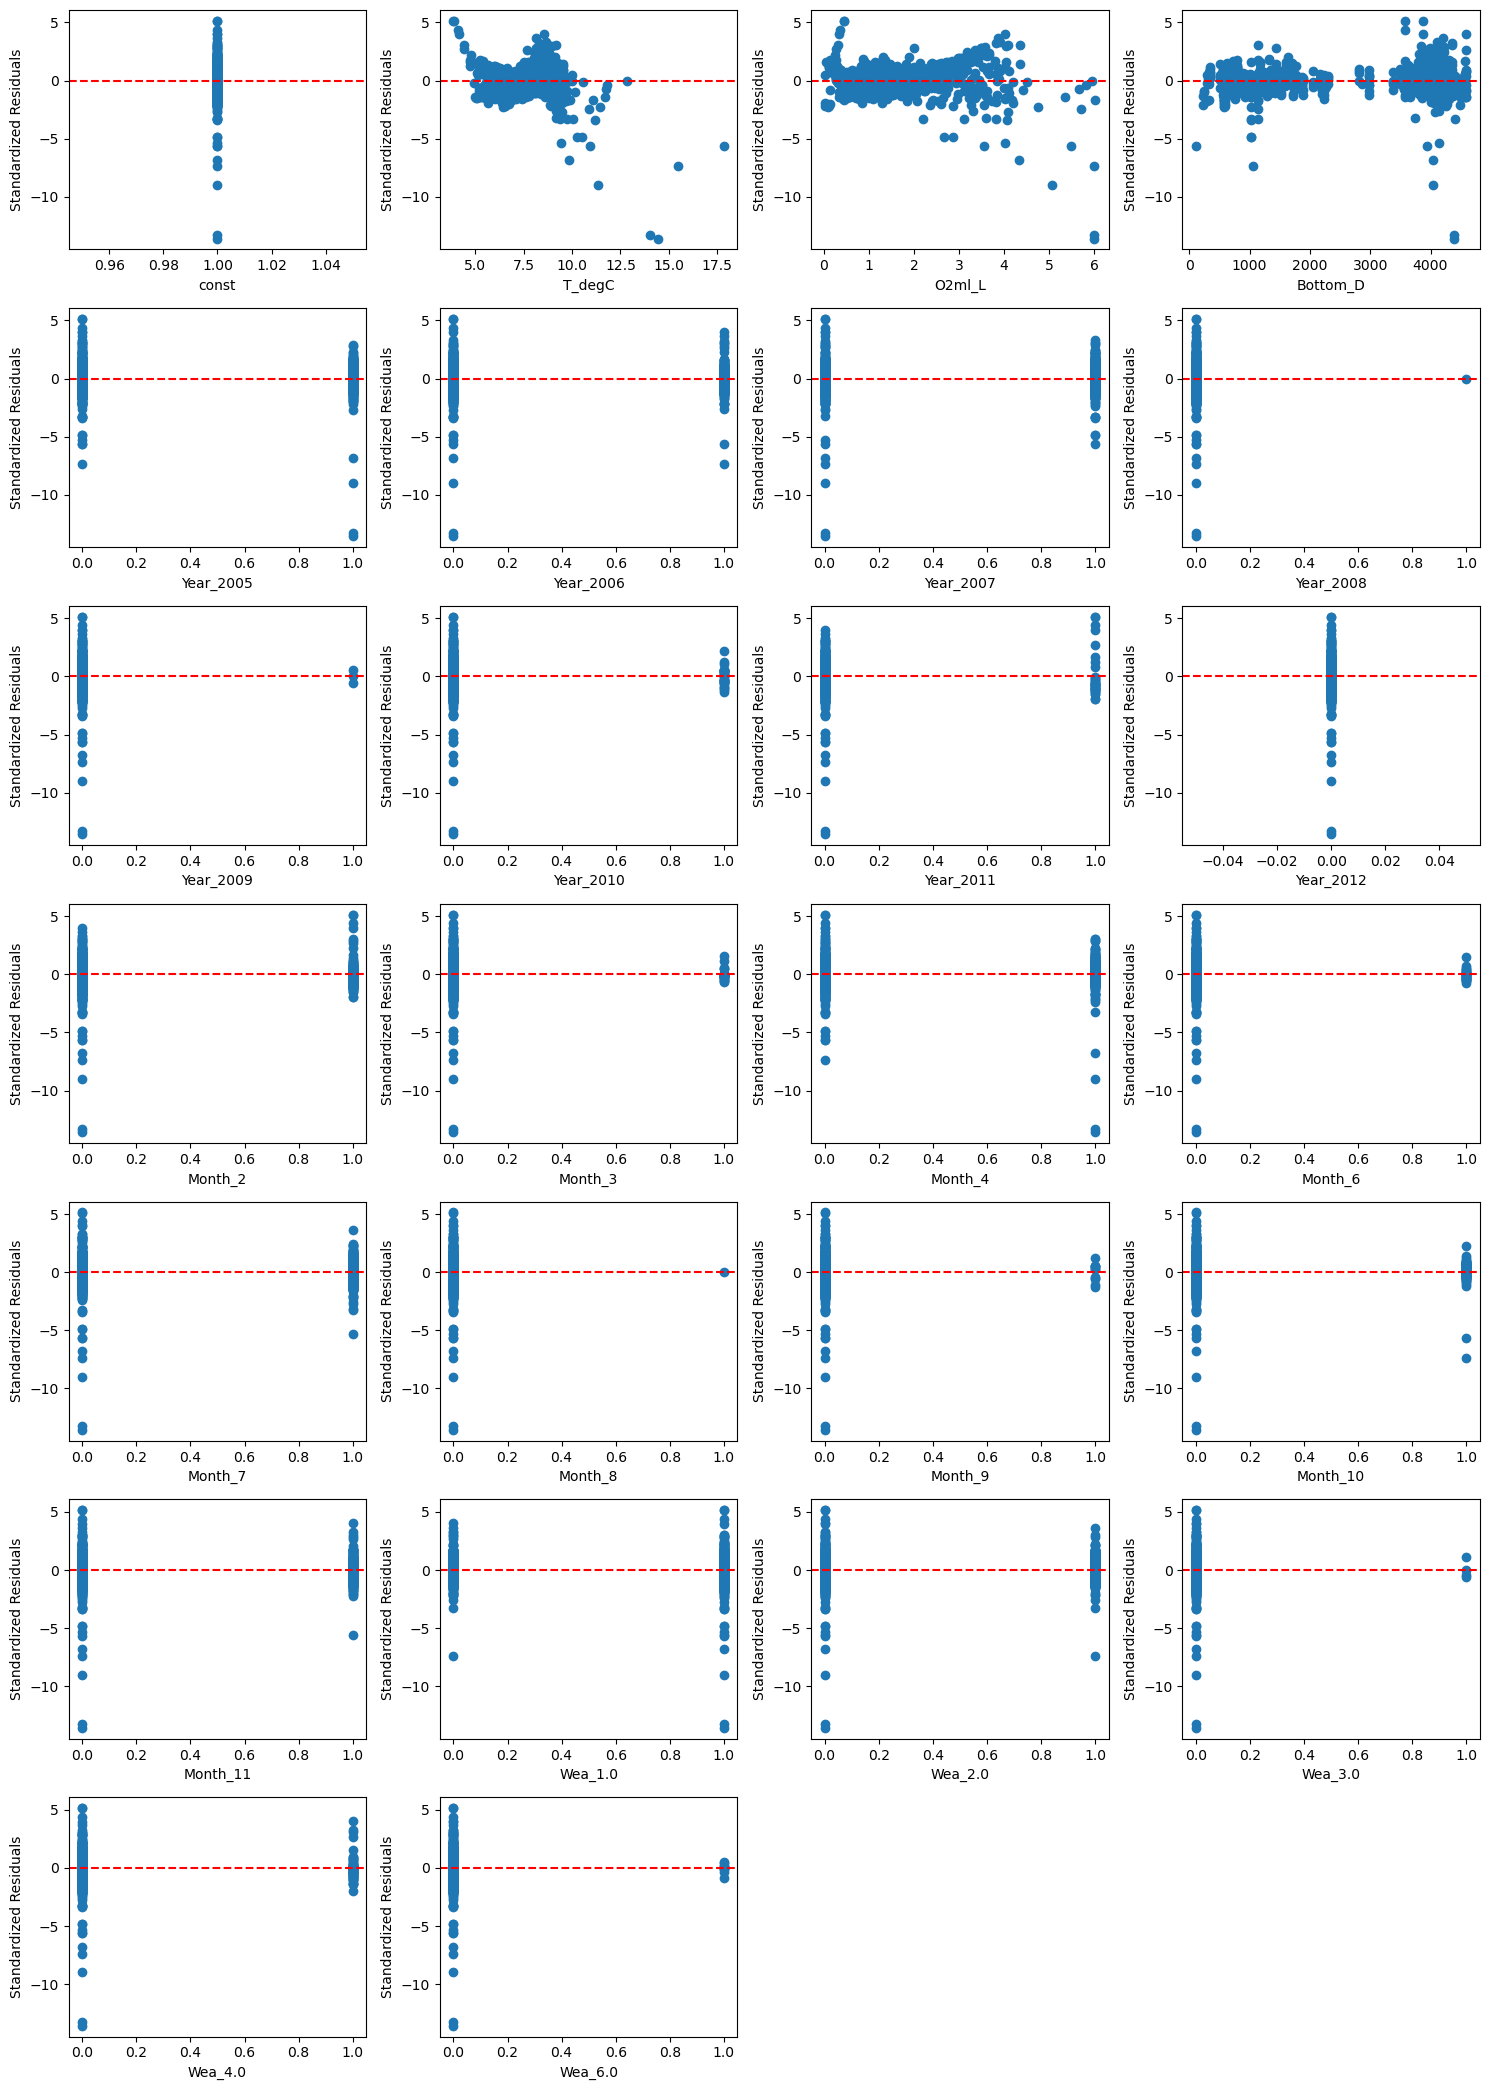

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Assuming 'x' is your DataFrame of predictor variables and 'y' is your response variable
# You need to add a constant term to the predictor variable for the intercept
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Get the standardized residuals
std_residuals = model.get_influence().resid_studentized_internal

# Plot standardized residuals against predictor variables
num_predictors = len(x.columns)
num_cols = 4  # You can adjust the number of columns based on your preference
num_rows = (num_predictors + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

for i, col in enumerate(x.columns):
    ax = axes.flatten()[i]
    ax.scatter(x[col], std_residuals)
    ax.set_xlabel(col)
    ax.set_ylabel('Standardized Residuals')
    ax.axhline(0, color='red', linestyle='--')

for j in range(num_predictors, num_cols * num_rows):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


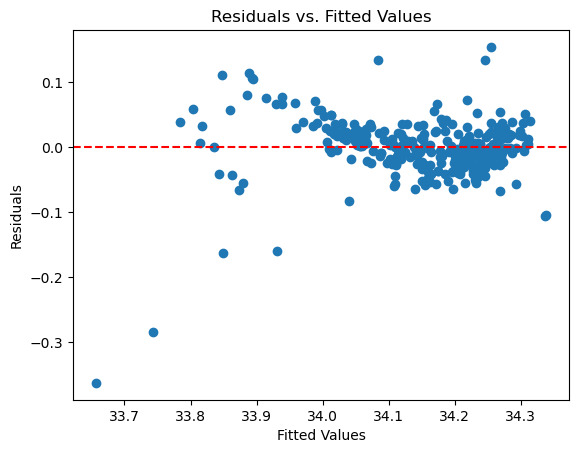

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd


# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


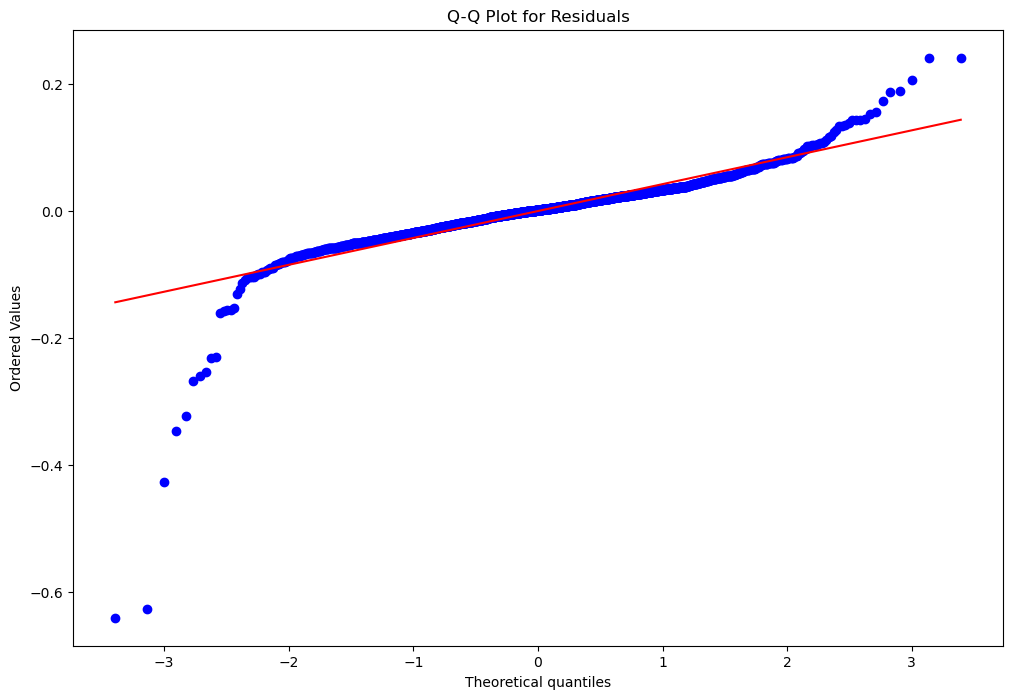

In [12]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


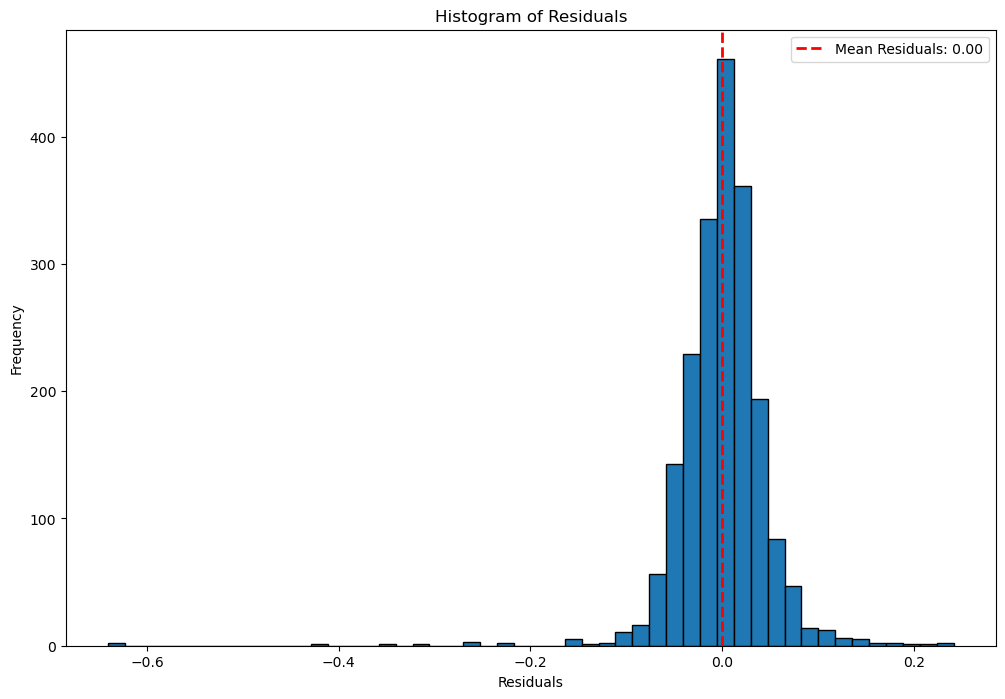

In [13]:
import matplotlib.pyplot as plt

# Assuming 'model' is your linear regression model
residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()

In [14]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable         VIF
0       const  171.818633
1      T_degC    4.160283
2      O2ml_L    4.259981
3    Bottom_D    1.861753
4   Year_2005    3.227249
5   Year_2006    3.944730
6   Year_2007    3.384925
7   Year_2008    1.021584
8   Year_2009    1.106501
9   Year_2010    2.088646
10  Year_2011    1.484104
11  Year_2012    1.076104
12    Month_2    2.374066
13    Month_3    1.193270
14    Month_4    2.241549
15    Month_6    1.138951
16    Month_7    2.692812
17    Month_8    1.126354
18    Month_9    1.740460
19   Month_10    1.761215
20   Month_11    2.410029
21    Wea_1.0    2.579623
22    Wea_2.0    2.681613
23    Wea_3.0    1.012429
24    Wea_4.0    1.348665
25    Wea_6.0    1.070800
